[View in Colaboratory](https://colab.research.google.com/github/PravallikaNarayan/PRAVALLIKA_BATCH_6_ASSIGNMENT2A/blob/master/session_4a.ipynb)

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


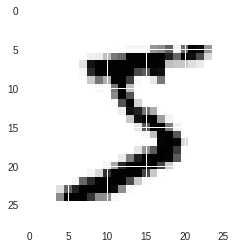

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(10, 12))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 1, 1, 10)          14410     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python2.7/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.1818 - acc: 0.9463

60000/60000 [==============================] - 105s 2ms/step - loss: 0.1817 - acc: 0.9463
Epoch 2/10
11808/60000 [====>.........................] - ETA: 1:24 - loss: 0.0726 - acc: 0.9787

60000/60000 [==============================] - 105s 2ms/step - loss: 0.0691 - acc: 0.9790


Epoch 3/10
14944/60000 [======>.......................] - ETA: 1:19 - loss: 0.0550 - acc: 0.9834

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [21]:
print(score)

[0.05891385641834641, 0.9837]


In [0]:
y_pred = model.predict(X_test)

In [24]:
print(y_pred[:9])
print(y_test[:9])

[[1.07521934e-12 2.36667325e-10 5.45960777e-10 1.89722834e-06
  5.00082357e-14 9.47254341e-12 1.65170974e-21 9.99998093e-01
  7.44891759e-10 9.29317068e-09]
 [4.91986521e-11 1.11956444e-06 9.99998212e-01 2.82309549e-12
  1.99217153e-17 1.72450700e-11 7.49950971e-07 2.94239758e-17
  2.38585429e-10 3.72219523e-16]
 [3.72295084e-08 9.99964476e-01 6.57318833e-06 8.91217233e-09
  2.40340723e-05 7.51116289e-08 2.29851452e-07 3.08899348e-06
  1.45277795e-06 7.30520977e-10]
 [9.99996185e-01 6.13904275e-11 2.29929447e-06 3.91385813e-10
  2.47291632e-10 7.91430210e-09 1.53771953e-06 1.54530888e-09
  7.44830697e-10 2.24432064e-08]
 [4.42278186e-10 4.09341484e-11 2.04411307e-10 3.35918759e-09
  9.99999404e-01 5.67600420e-15 2.39425623e-12 2.57669015e-08
  4.15585122e-09 5.37558435e-07]
 [2.19940368e-08 9.99688625e-01 3.44244336e-06 1.28620350e-08
  2.18181667e-05 9.07650399e-09 1.37375515e-08 2.80245004e-04
  5.84148665e-06 2.40884575e-08]
 [1.44290951e-13 9.67758407e-09 1.98597554e-03 4.71245158e